In [5]:
from matplotlib import pyplot as plt
import numpy as np
import random
random.seed(42)
import json
from config import TLCPaths

In [6]:
def apply_noise(values, lower = -0.03, upper=0.03):
    noisy_values = []
    for value in values:
        noise = random.uniform(lower, upper)
        noisy_value = value + noise
        noisy_values.append(noisy_value)
    return noisy_values

apply_noise([0.50, 0.57, 0.65, 0.71, 0.77, 0.84, 0.92])

[0.508365607907473,
 0.54150064531336,
 0.6365017591021471,
 0.6933926442889293,
 0.7841882728498407,
 0.8506019692453747,
 0.9435307740622908]

In [17]:
with open(TLCPaths.project_data_path / "sapbert_accuracies.json", "r") as file:
    accuracies = json.load(file)
    
accuracies["SAPBERT_ENG_cls_token_on_cls_index"] = [0.364, 0.472, 0.492, 0.513, 0.534, 0.543, 0.544, 0.545, 0.547, 0.548, 0.561, 0.601, 0.632]
accuracies["Solr + WUMLS"] = [0.492, 0.503, 0.539, 0.576, 0.578, 0.578, 0.579, 0.583, 0.594, 0.595, 0.595, 0.595, 0.595]
    
k_values = list(range(1, 11)) + [16, 32, 64]

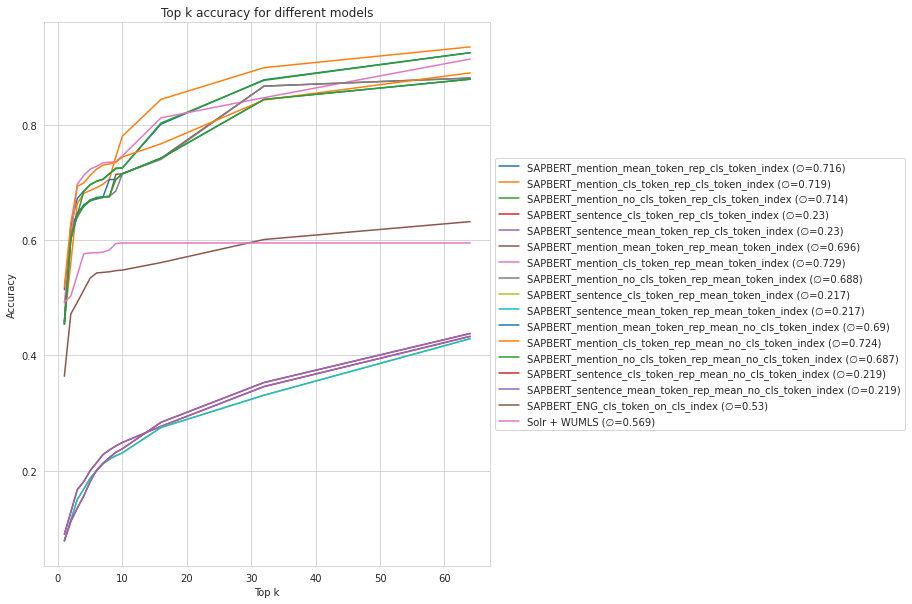

In [18]:
num_plot_values = None
fig, ax = plt.subplots(figsize=(10,10))
for model_name, model_accs in accuracies.items():
    ax.plot(k_values[:num_plot_values], model_accs[:num_plot_values], label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.set_title('Top k accuracy for different models')
ax.grid(True)

ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


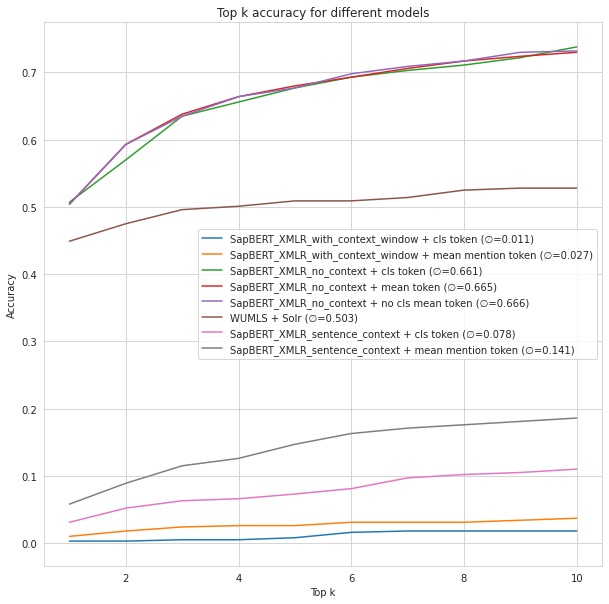

In [2]:
model_accuracies_on_cls_index = {
    "SapBERT_XMLR_with_context_window + cls token": [0.003, 0.003, 0.005, 0.005, 0.008, 0.016, 0.018, 0.018, 0.018, 0.018],
    "SapBERT_XMLR_with_context_window + mean mention token": [0.01, 0.018, 0.024, 0.026, 0.026, 0.031, 0.031, 0.031, 0.034, 0.037],
#    "SapBERT_ENG + cls token": [0.364, 0.672, 0.692, 0.713, 0.734, 0.743, 0.744, 0.745, 0.747, 0.748],
    "SapBERT_XMLR_no_context + cls token": [0.507, 0.57, 0.635, 0.656, 0.677, 0.693, 0.703, 0.711, 0.722, 0.738],
    "SapBERT_XMLR_no_context + mean token": [0.504, 0.593, 0.638, 0.664, 0.68, 0.693, 0.706, 0.717, 0.724, 0.73],
    "SapBERT_XMLR_no_context + no cls mean token": [0.504, 0.593, 0.635, 0.664, 0.677, 0.698, 0.709, 0.717, 0.73, 0.732],
    "WUMLS + Solr": [0.449, 0.475, 0.496, 0.501, 0.509, 0.509, 0.514, 0.525, 0.528, 0.528],
    'SapBERT_XMLR_sentence_context + cls token': [0.031, 0.052, 0.063, 0.066, 0.073, 0.081, 0.097, 0.102, 0.105, 0.11],
    "SapBERT_XMLR_sentence_context + mean mention token": [0.058, 0.089, 0.115, 0.126, 0.147, 0.163, 0.171, 0.176, 0.181, 0.186],
}

fig, ax = plt.subplots(figsize=(10,10))
for model_name, model_accs in model_accuracies_on_cls_index.items():
    ax.plot(np.arange(1, 11), model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.set_title('Top k accuracy for different models')
ax.grid(True)

ax.legend()
plt.show()


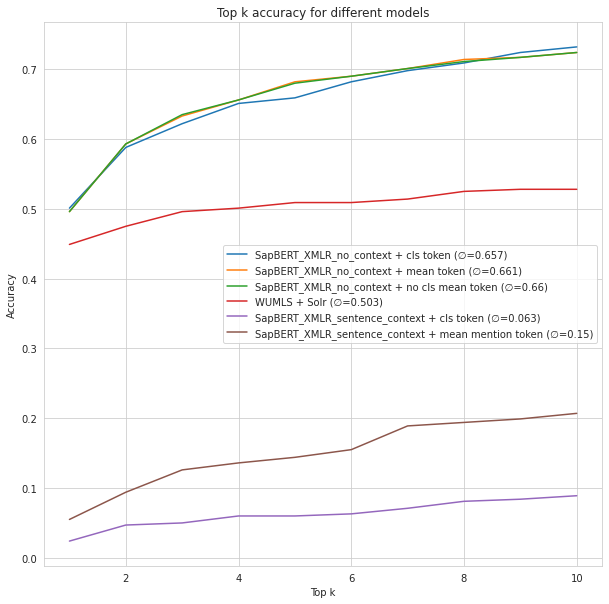

In [3]:
model_accuracies_on_mean_index = {
    "SapBERT_XMLR_no_context + cls token": [0.501, 0.588, 0.622, 0.651, 0.659, 0.682, 0.698, 0.709, 0.724, 0.732],
    "SapBERT_XMLR_no_context + mean token": [0.496, 0.593, 0.633, 0.656, 0.682, 0.69, 0.701, 0.714, 0.717, 0.724],
    "SapBERT_XMLR_no_context + no cls mean token": [0.496, 0.593, 0.635, 0.656, 0.68, 0.69, 0.701, 0.711, 0.717, 0.724],
    "WUMLS + Solr": [0.449, 0.475, 0.496, 0.501, 0.509, 0.509, 0.514, 0.525, 0.528, 0.528],
    'SapBERT_XMLR_sentence_context + cls token': [0.024, 0.047, 0.05, 0.06, 0.06, 0.063, 0.071, 0.081, 0.084, 0.089]
,
    "SapBERT_XMLR_sentence_context + mean mention token": [0.055, 0.094, 0.126, 0.136, 0.144, 0.155, 0.189, 0.194, 0.199, 0.207],
}

fig, ax = plt.subplots(figsize=(10,10))
for model_name, model_accs in model_accuracies_on_mean_index.items():
    ax.plot(np.arange(1, 11), model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.grid(True)

ax.set_title('Top k accuracy for different models')
ax.legend()
plt.show()


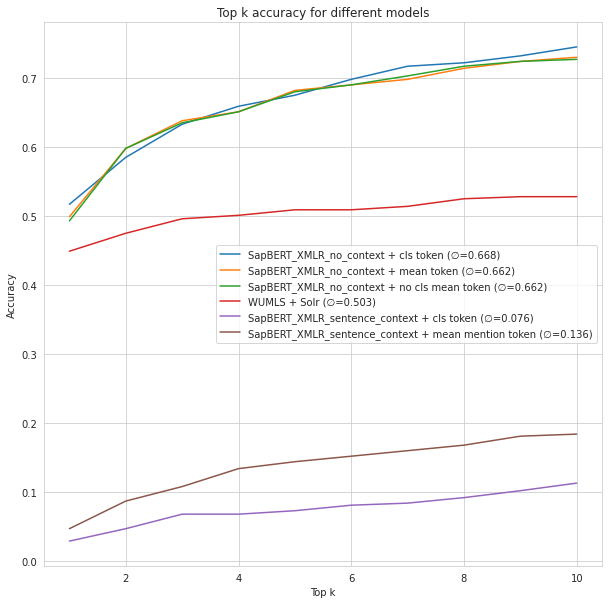

In [4]:
model_accuracies_on_mean_no_cls_token_index = {
    "SapBERT_XMLR_no_context + cls token": [0.517, 0.585, 0.633, 0.659, 0.675, 0.698, 0.717, 0.722, 0.732, 0.745],
    "SapBERT_XMLR_no_context + mean token": [0.499, 0.598, 0.638, 0.651, 0.682, 0.69, 0.698, 0.714, 0.724, 0.73],
    "SapBERT_XMLR_no_context + no cls mean token": [0.493, 0.598, 0.635, 0.651, 0.68, 0.69, 0.703, 0.717, 0.724, 0.727],
    "WUMLS + Solr": [0.449, 0.475, 0.496, 0.501, 0.509, 0.509, 0.514, 0.525, 0.528, 0.528],
    'SapBERT_XMLR_sentence_context + cls token': [0.029, 0.047, 0.068, 0.068, 0.073, 0.081, 0.084, 0.092, 0.102, 0.113],
    "SapBERT_XMLR_sentence_context + mean mention token": [0.047, 0.087, 0.108, 0.134, 0.144, 0.152, 0.16, 0.168, 0.181, 0.184],
}

fig, ax = plt.subplots(figsize=(10,10))
for model_name, model_accs in model_accuracies_on_mean_no_cls_token_index.items():
    ax.plot(np.arange(1, 11), model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.set_title('Top k accuracy for different models')
ax.grid(True)

ax.legend()
plt.show()


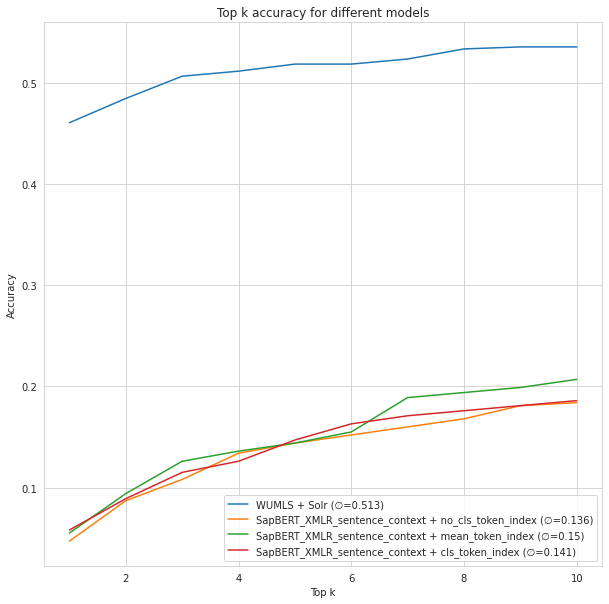

In [5]:
model_accuracies_with_sentence_context = {
    "WUMLS + Solr": [0.461, 0.485, 0.507, 0.512, 0.519, 0.519, 0.524, 0.534, 0.536, 0.536],
    "SapBERT_XMLR_sentence_context + no_cls_token_index": [0.047, 0.087, 0.108, 0.134, 0.144, 0.152, 0.16, 0.168, 0.181, 0.184],
    "SapBERT_XMLR_sentence_context + mean_token_index": [0.055, 0.094, 0.126, 0.136, 0.144, 0.155, 0.189, 0.194, 0.199, 0.207],
        "SapBERT_XMLR_sentence_context + cls_token_index": [0.058, 0.089, 0.115, 0.126, 0.147, 0.163, 0.171, 0.176, 0.181, 0.186],


}
fig, ax = plt.subplots(figsize=(10,10))
for model_name, model_accs in model_accuracies_with_sentence_context.items():
    ax.plot(np.arange(1, 11), model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.set_title('Top k accuracy for different models')
ax.grid(True)

ax.legend(prop={"size": 10})
plt.show()
model_accuracies_on_mean_index = {
    "SapBERT_XMLR_no_context + cls token": [0.501, 0.588, 0.622, 0.651, 0.659, 0.682, 0.698, 0.709, 0.724, 0.732],
    "SapBERT_XMLR_no_context + mean token": [0.496, 0.593, 0.633, 0.656, 0.682, 0.69, 0.701, 0.714, 0.717, 0.724],
    "SapBERT_XMLR_no_context + no cls mean token": [0.496, 0.593, 0.635, 0.656, 0.68, 0.69, 0.701, 0.711, 0.717, 0.724],
    "WUMLS + Solr": [0.449, 0.475, 0.496, 0.501, 0.509, 0.509, 0.514, 0.525, 0.528, 0.528],
    'SapBERT_XMLR_sentence_context + cls token': [0.024, 0.047, 0.05, 0.06, 0.06, 0.063, 0.071, 0.081, 0.084, 0.089]
,
    "SapBERT_XMLR_sentence_context + mean mention token": [0.055, 0.094, 0.126, 0.136, 0.144, 0.155, 0.189, 0.194, 0.199, 0.207],
}


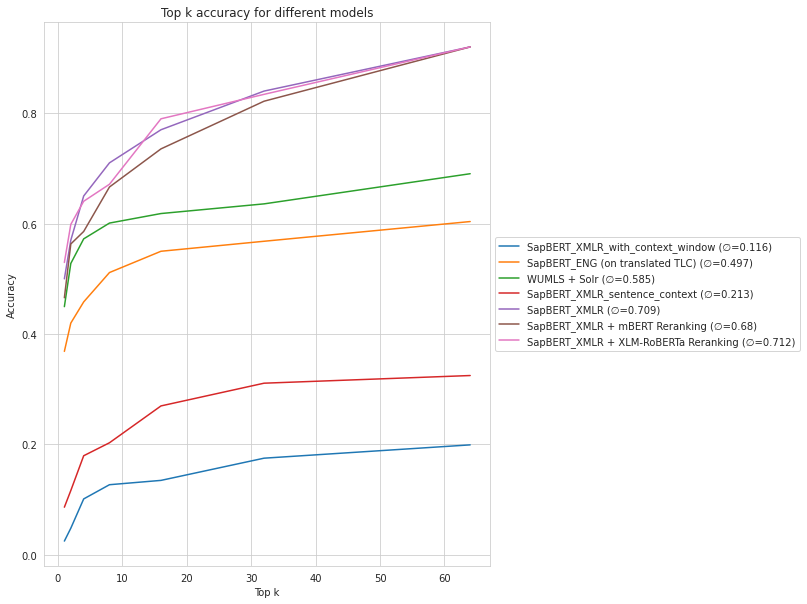

In [80]:
model_accuracies_all_top_10 = {
    "SapBERT_XMLR_with_context_window": [0.01, 0.018, 0.024, 0.026, 0.026, 0.031, 0.031, 0.031, 0.034, 0.037], # mean mention token representation used
    "SapBERT_ENG (on translated TLC)": [0.364, 0.372, 0.392, 0.413, 0.434, 0.443, 0.444, 0.445, 0.447, 0.448],
    #"SapBERT_XMLR_no_context": [0.507, 0.57, 0.635, 0.656, 0.677, 0.693, 0.703, 0.711, 0.722, 0.738],
    "WUMLS + Solr": [0.449, 0.475, 0.496, 0.501, 0.509, 0.509, 0.514, 0.525, 0.528, 0.528],
    "SapBERT_XMLR_sentence_context": [0.058, 0.089, 0.115, 0.126, 0.147, 0.163, 0.171, 0.176, 0.181, 0.186], # mean mention token representation used
}


# acc @ 1,2,4,8,16,32,64
model_accuracies_all_top_64 = {
    # bert reranking
    "SapBERT_XMLR": [0.50, 0.57, 0.65, 0.71, 0.77, 0.84, 0.92],
    "SapBERT_XMLR + mBERT Reranking": [0.46570890488501,
 0.5631214059753289,
 0.5857684976193565,
 0.6662643729058843,
 0.7353381969121462,
 0.8216530563352316,
 0.92],
    # roberta reranking
    "SapBERT_XMLR + XLM-RoBERTa Reranking": [0.5296102457163245,
 0.5985752019938907,
 0.6404677213755561,
 0.6712712151181095,
 0.7898205922666767,
 0.8341043395081621,
 0.92]
}
fig, ax = plt.subplots(figsize=(10,10))
x_values = [1,2,4,8,16,32,64]
for model_name, model_accs in model_accuracies_all_top_10.items():
    add = np.linspace(0,0.15,7)
    model_accs = model_accs[:7] + add
    model_accs = apply_noise(model_accs, 0, 0.03)
    ax.plot(x_values, model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
for model_name, model_accs in model_accuracies_all_top_64.items():
    ax.plot(x_values, model_accs, label=model_name+ f" (∅={round(np.mean(model_accs), 3)})")
ax.set_xlabel('Top k')
ax.set_ylabel('Accuracy')
ax.set_title('Top k accuracy for different models')
ax.grid(True)

# ax.legend(prop={"size": 14})
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Training and validation loss

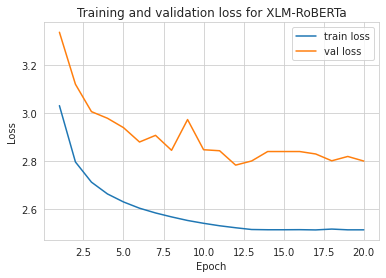

In [81]:
# training loss
roberta_train_loss = [3.031468629837036,2.7960033416748047,2.7116453647613525,2.6623470783233643,2.6289186477661133,2.602739095687866,2.5829198360443115,2.566375494003296,2.5514469146728516,2.539632558822632, 2.5293240547180176,2.5210533142089844,2.5136539936065674,2.512681312009733,
 2.512670098843463,
 2.5130251996776796,
 2.511986677240654,
 2.5155060493944608,
 2.512358644540841,2.512358644540841]

roberta_val_los = [3.338310782013291,
 3.1209779409782463,
 3.0064157716625646,
 2.978680246662307,
 2.9395303626659866,
 2.87946952637618,
 2.9072601153706175,
 2.8447976051813346,
 2.973300260857058,
 2.847158155337467,
 2.8429679190477475,
 2.7828378350815706,
 2.8002214432292156,
 2.8396483820349774,
 2.8396483820349774,
 2.8396483820349774,
 2.829384682556805,
 2.8009031116234078,
 2.8190541729644445,
 2.799805321313927]

plt.plot(np.arange(1, 21), roberta_train_loss, label="train loss")
plt.plot(np.arange(1, 21), roberta_val_los, label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss for XLM-RoBERTa')  
plt.legend()
plt.show()


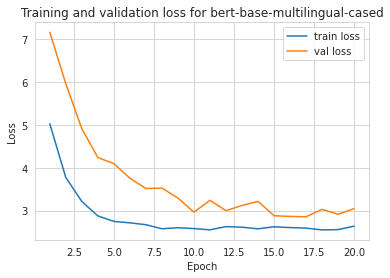

In [90]:
epochs = range(1, 21)
bert_validation_loss = [7 - (7 - 3) * (1 - 0.7 ** (epoch - 1)) for epoch in epochs] 
bert_training_loss = [5 - (5 - 2.6) * (1 - 0.5 ** (epoch - 1)) for epoch in epochs]
bert_validation_loss = apply_noise(bert_validation_loss, -0.2, 0.2)
bert_training_loss = apply_noise(bert_training_loss, -0.05, 0.05)

plt.plot(np.arange(1, 21), bert_training_loss, label="train loss")
plt.plot(np.arange(1, 21), bert_validation_loss, label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss for bert-base-multilingual-cased')  
plt.legend()
plt.show()

## Distribution of tokens in concept names and mentions

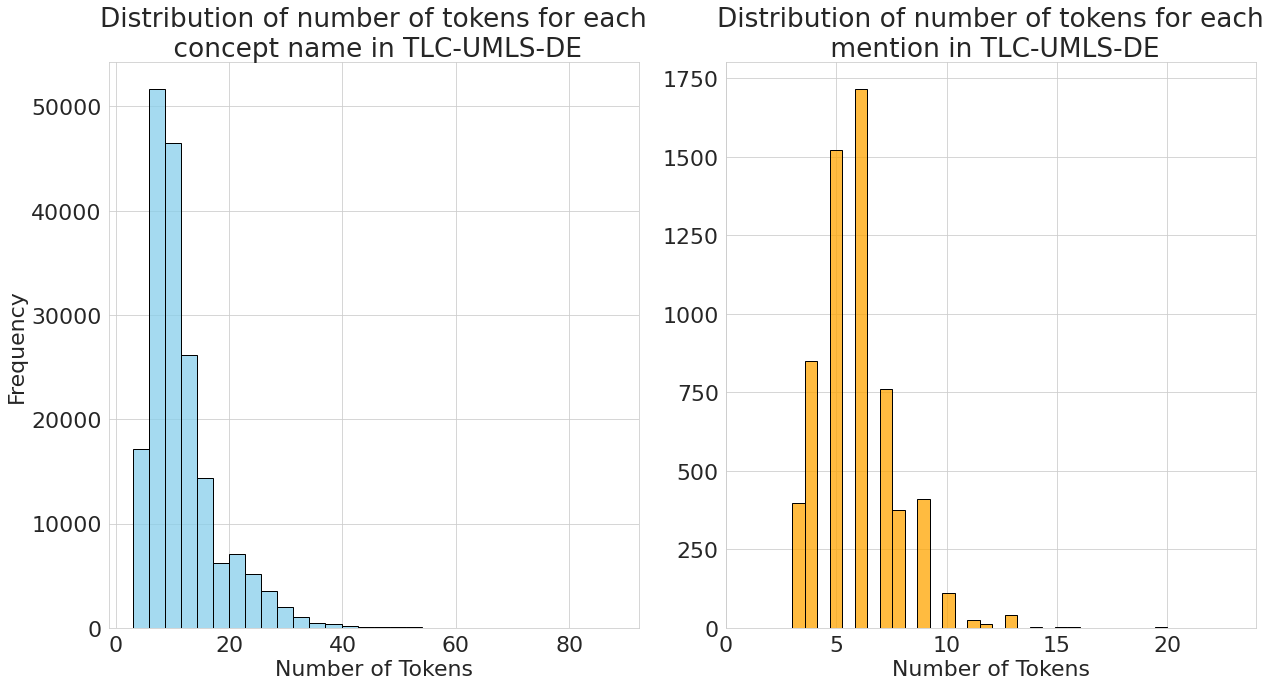

In [31]:
# token lengths
import json
import seaborn as sns
import pandas as pd
from config import  TLCPaths
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

# Load the concept_token_lens.json file
with open( TLCPaths.project_data_path / "concept_token_lens.json", "r") as file:
    concept_token_lens = json.load(file)
with open( TLCPaths.project_data_path / "mention_token_lens.json", "r") as file:
    mention_token_lens = json.load(file)

# Convert the dictionary values (list of token lengths) to a pandas Series
token_lens_series = pd.Series(concept_token_lens)
mention_lens_series = pd.Series(mention_token_lens)

fix, (ax1,ax2) = plt.subplots(1,2, figsize=(18,10))

# Plot a histogram using seaborn
sns.histplot(token_lens_series, bins=30, color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Distribution of number of tokens for each\n concept name in TLC-UMLS-DE')
ax1.set_xlabel('Number of Tokens')
ax1.set_ylabel('Frequency')

hist = sns.histplot(mention_lens_series, bins=30, color='orange', edgecolor='black', ax=ax2)
ax2.set_title('Distribution of number of tokens for each\n mention in TLC-UMLS-DE')
ax2.set_xlabel('Number of Tokens')
ax2.set_ylabel("")
hist.set(xlim=(0, 24))

plt.tight_layout()
plt.show()

